Processing with Blue background...


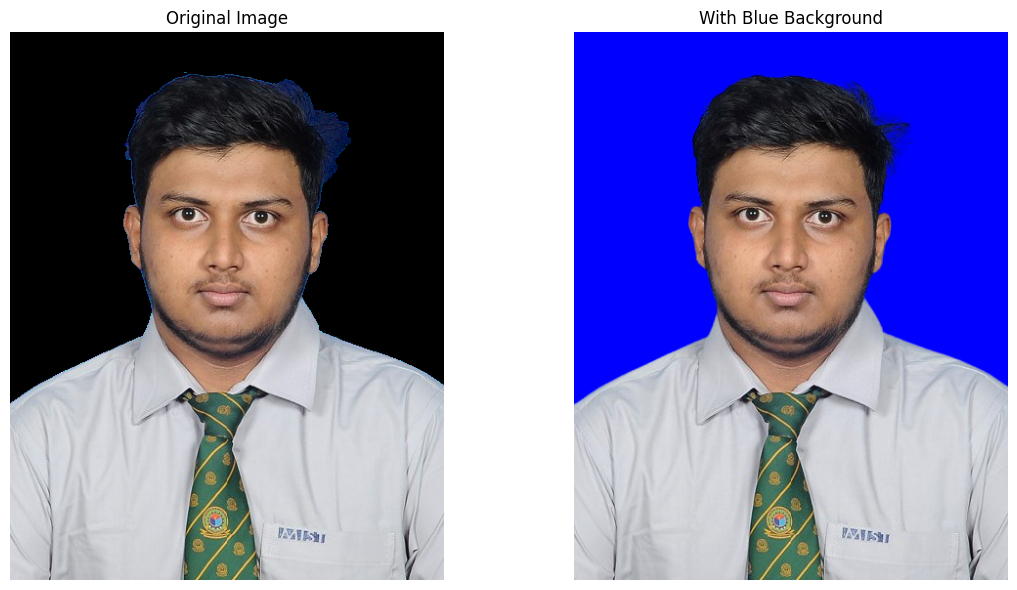

✅ Done! Your download will begin shortly...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Install required packages
!pip install rembg pillow onnxruntime -q
!pip install rembg pillow matplotlib
!pip install onnxruntime
# Enable custom widgets in Colab
from google.colab import output
output.enable_custom_widget_manager()

# Imports
from google.colab import files
from PIL import Image
from rembg import remove
import io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Predefined background colors
color_options = {
    "White": (255, 255, 255),
    "Red": (255, 0, 0),
    "Green": (0, 255, 0),
    "Blue": (0, 0, 255),
    "Yellow": (255, 255, 0),
    "Black": (0, 0, 0),
    "Gray": (128, 128, 128)
}

# UI Widgets
color_dropdown = widgets.Dropdown(
    options=color_options.keys(),
    value="White",
    description='Background Color:',
    style={'description_width': 'initial'}
)
process_button = widgets.Button(description="Process Image", button_style='success')

# Display UI
display(widgets.VBox([color_dropdown, process_button]))

# File paths
input_path = None
output_path = "processed_image.jpg"

# Image processing function
def remove_background_and_add_color(input_path, output_path, bg_color):
    with open(input_path, "rb") as file:
        input_image = file.read()
    result = remove(input_image)
    image = Image.open(io.BytesIO(result)).convert("RGBA")
    color_bg = Image.new("RGBA", image.size, bg_color + (255,))
    final_image = Image.alpha_composite(color_bg, image).convert("RGB")
    final_image.save(output_path)
    return final_image

# Upload image prompt
print("📷 Please upload your image...")
uploaded = files.upload()
input_path = list(uploaded.keys())[0]

# Event handler for button click
def on_button_click(b):
    try:
        clear_output(wait=True)
        display(widgets.VBox([color_dropdown, process_button]))

        selected_color_name = color_dropdown.value
        bg_color = color_options[selected_color_name]

        print(f"Processing with {selected_color_name} background...")
        processed_image = remove_background_and_add_color(input_path, output_path, bg_color)

        # Show both images side by side
        original_image = Image.open(input_path).convert("RGB")
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(processed_image)
        plt.title(f"With {selected_color_name} Background")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

        print("✅ Done! Your download will begin shortly...")
        files.download(output_path)

    except Exception as e:
        print(f"❌ Error: {str(e)}")

# Bind button click
process_button.on_click(on_button_click)
